In [1]:
# problem found is even position of 7 in range 2.5 km there are no building data
# so we should have upper bound for poi range =1km
# lower bound is range 100 m

In [2]:
import os
import pandas as pd

In [3]:
poi_data_path = "all_pois_relabeled_v4.feather"
poi_df = pd.read_feather(poi_data_path)
poi_df.head()

,sub_code_name,latitude,longitude,last_edited_date,db_date,type,name,type_lvl01,type_lvl02,type_lvl03,count,detected_language
0,จุดข้ามถนน,7.959148,98.383732,2019-03-15 04:17:25,2023-08-21,cross_street,,cross_street,cross_street_2,จุดข้ามถนน,1,en
1,จุดข้ามถนน,15.719866,100.099756,2019-03-15 04:17:25,2023-08-21,cross_street,,cross_street,cross_street_2,จุดข้ามถนน,1,en
2,จุดข้ามถนน,16.184609,103.303293,2019-03-15 04:17:25,2023-08-21,cross_street,ถ.นครสวรรค์ ต.ตลาด อ.เมือง จ.ร้อยเอ็ด,cross_street,cross_street_2,จุดข้ามถนน,1,th
3,จุดข้ามถนน,12.665852,101.297993,2019-03-15 04:17:25,2023-08-21,cross_street,,cross_street,cross_street_2,จุดข้ามถนน,1,en
4,จุดข้ามถนน,13.563442,100.532670,2019-03-30 01:30:14,2023-08-21,cross_street,,cross_street,cross_street_2,จุดข้ามถนน,1,en


In [4]:
poi_df["lat_lon"] = poi_df["latitude"].map(str) + "," + poi_df["longitude"].map(str)
# check is lat_lon is unique
poi_df["lat_lon"].nunique() == len(poi_df)

False

In [11]:
len(poi_df) - poi_df["lat_lon"].nunique()

165206

In [6]:
poi_df["lat_lon_name"] = (
    poi_df["latitude"].map(str)
    + ","
    + poi_df["longitude"].map(str)
    + ","
    + poi_df["name"]
)
# display row that not unique

In [14]:
# for row that lat_lon_name is unique
lat_lon_name_type3_list = []
check_lat_lon_name_list = []
for index, row in poi_df.iterrows():
    lat_lon_name = (
        str(row["latitude"]) + "|" + str(row["longitude"]) + "|" + row["name"]
    )
    lat_lon_name_type3 = (
        str(row["latitude"])
        + "|"
        + str(row["longitude"])
        + "|"
        + row["name"]
        + "|"
        + row["type_lvl03"]
    )

    if lat_lon_name in check_lat_lon_name_list:
        continue
    else:
        check_lat_lon_name_list.append(lat_lon_name)
        lat_lon_name_type3_list.append(lat_lon_name_type3)

KeyboardInterrupt: 

In [8]:
poi_df["lat_lon_name_type3"] = (
    poi_df["latitude"].map(str)
    + ","
    + poi_df["longitude"].map(str)
    + ","
    + poi_df["name"]
    + ","
    + poi_df["type_lvl03"]
)
# display row that not unique

In [9]:
len(poi_df) - poi_df["lat_lon_name_type3"].nunique()

55934

In [10]:
len(poi_df) - poi_df["lat_lon_name"].nunique()

2916

In [100]:
lat_lon_name_list = poi_df["lat_lon_name"].unique().tolist()

In [97]:
duplicate_rows = poi_df[poi_df["lat_lon_name"].duplicated(keep=False)]
# sort by lat_lon_name
duplicate_rows = duplicate_rows.sort_values(by=["lat_lon_name"])
duplicate_rows

,sub_code_name,latitude,longitude,last_edited_date,db_date,type,name,type_lvl01,type_lvl02,type_lvl03,count,detected_language,lat_lon,lat_lon_name
146734,ท่าเทียบเรือพาณิชย์,10.006957,98.607567,2022-06-10 15:49:57,2023-08-21,industrial_area,ท่าเรือระนอง,industrial_area,industrial_area_2,ท่าเทียบเรือพาณิชย์,1,th,"10.006957406000026,98.60756728500009","10.006957406000026,98.60756728500009,ท่าเรือระนอง"
1120968,ท่าเทียบเรือพาณิชย์,10.006957,98.607567,2022-06-10 13:40:58,2023-08-21,public_transportation,ท่าเรือระนอง,public_transportation,public_transportation_2,ท่าเทียบเรือพาณิชย์,1,th,"10.006957406000026,98.60756728500009","10.006957406000026,98.60756728500009,ท่าเรือระนอง"
145665,ท่าเทียบเรือพาณิชย์,10.126163,98.676436,2022-06-10 15:49:42,2023-08-21,industrial_area,ท่าเรือท่าโพธิ์,industrial_area,industrial_area_2,ท่าเทียบเรือพาณิชย์,1,th,"10.126163226000074,98.67643604700004","10.126163226000074,98.67643604700004,ท่าเรือท่..."
1120952,ท่าเทียบเรือพาณิชย์,10.126163,98.676436,2022-06-10 13:40:57,2023-08-21,public_transportation,ท่าเรือท่าโพธิ์,public_transportation,public_transportation_2,ท่าเทียบเรือพาณิชย์,1,th,"10.126163226000074,98.67643604700004","10.126163226000074,98.67643604700004,ท่าเรือท่..."
1120298,ท่าเทียบเรือพาณิชย์,10.209978,99.205073,2022-06-10 13:40:58,2023-08-21,public_transportation,ท่าเทียบเรือประมง,public_transportation,public_transportation_2,ท่าเทียบเรือพาณิชย์,1,th,"10.20997778700007,99.20507336500005","10.20997778700007,99.20507336500005,ท่าเทียบเร..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136925,ท่าเทียบเรือพาณิชย์,9.981309,98.600471,2022-06-10 15:49:14,2023-08-21,industrial_area,ท่าเทียบเรือศุลกากรระนอง,industrial_area,industrial_area_2,ท่าเทียบเรือพาณิชย์,1,th,"9.981309209000074,98.60047139200005","9.981309209000074,98.60047139200005,ท่าเทียบเร..."
136805,ท่าเทียบเรือพาณิชย์,9.983921,98.601490,2022-06-11 08:51:15,2023-08-21,industrial_area,ท่าส่งออกน้ำมันเขตปลอดอากร,industrial_area,industrial_area_2,ท่าเทียบเรือพาณิชย์,1,th,"9.98392069700003,98.60148959800006","9.98392069700003,98.60148959800006,ท่าส่งออกน้..."
1121812,ท่าเทียบเรือพาณิชย์,9.983921,98.601490,2022-06-11 05:33:38,2023-08-21,public_transportation,ท่าส่งออกน้ำมันเขตปลอดอากร,public_transportation,public_transportation_2,ท่าเทียบเรือพาณิชย์,1,th,"9.98392069700003,98.60148959800006","9.98392069700003,98.60148959800006,ท่าส่งออกน้..."
145723,ท่าเทียบเรือพาณิชย์,9.988815,98.601688,2022-06-10 15:49:25,2023-08-21,industrial_area,ท่าเทียบเรือแสนสดใส,industrial_area,industrial_area_2,ท่าเทียบเรือพาณิชย์,1,th,"9.988815287000024,98.60168793900004","9.988815287000024,98.60168793900004,ท่าเทียบเร..."


In [3]:
from geo_utils import (
    get_bbox_polygon_from_lat_lon,
    get_features_from_lat_lon,
    load_data_excel,
    tags_dict,
    latlon_crs,
    meter_crs,
)
import osmnx as ox
import pyproj
from collections import Counter
import pandas as pd
from tqdm import tqdm

import json
import time
import os
import geopandas as gpd
from shapely.geometry import Point
from typing import List, Optional

import traceback


def buffer_road_metre(buffer_drive_data, road_size=1):
    # Assuming buffer_drive_data is a pandas DataFrame

    buffer_drive_data["geometry"] = buffer_drive_data.apply(
        lambda x: x.geometry.buffer(road_size / 2), axis=1
    )
    return buffer_drive_data


def grid_points_from_bbox(bbox: List[int], spacing: int = 100, cover_size: int = 1600):
    spacing = int(spacing)
    grid_points = []

    x_min, y_min, x_max, y_max = bbox
    w = cover_size
    h = cover_size
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    x_min = center_x - w / 2
    y_min = center_y - h / 2
    x_max = center_x + w / 2
    y_max = center_y + h / 2
    for x in range(int(x_min) + spacing // 2, int(x_max), spacing):
        for y in range(int(y_min) + spacing // 2, int(y_max), spacing):
            point = Point(x, y)
            grid_points.append(point)
    return grid_points


def select_only_polygon(building_data: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("before")
    print(Counter(building_data.geometry.type))
    # Polygon or MultiPolygon is allowed
    building_data = building_data[
        (building_data["geometry"].type == "Polygon")
        | (building_data["geometry"].type == "MultiPolygon")
    ]
    print("after")
    print(Counter(building_data.geometry.type))
    return building_data


def get_building_info_from_lat_lon(
    lat, lon, dist, grid_size=100
) -> Optional[gpd.GeoDataFrame]:
    try:
        building_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["building"])
    except ox._errors.InsufficientResponseError:
        return None
    except Exception:
        traceback.print_exc()
        raise "Unknown error"
    # buffer road with 1 meter wide
    building_data = building_data.to_crs(meter_crs)
    building_data = select_only_polygon(building_data)
    # create a coverage polygon to create grid
    bbox_polygon = get_bbox_polygon_from_lat_lon(lat, lon, dist)
    polygon_gdf_latlon = gpd.GeoDataFrame(
        {"geometry": bbox_polygon}, index=[0], crs=latlon_crs
    )
    # convert to meter
    polygon_gdf = polygon_gdf_latlon.to_crs(meter_crs)
    bbox = polygon_gdf.total_bounds
    # create grid points
    grid_points = grid_points_from_bbox(bbox, spacing=grid_size, cover_size=dist * 2)
    grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=meter_crs)

    # buffer grid points to make small square over the grid points
    buffered_grid_gdf = grid_gdf
    buffered_grid_gdf["geometry"] = buffered_grid_gdf["geometry"].buffer(
        grid_size / 2, cap_style=3
    )
    buffered_grid_gdf["grid_id"] = buffered_grid_gdf.index

    # get intersection between grid and road to extract each kinds of road area
    intersection_gdf = gpd.overlay(buffered_grid_gdf, building_data, how="intersection")
    # print(intersection_gdf.__dict__)
    # print(intersection_gdf.building.unique())
    # raise
    buffered_grid_gdf["building_area"] = 0.0
    for key in intersection_gdf.building.unique():
        buffered_grid_gdf["building_area_" + key] = 0.0
    for index, row in intersection_gdf.iterrows():
        grid_id = row["grid_id"]
        building_type = row["building"]

        # print(type(building_type))

        area = row["geometry"].area
        # print(type(area))
        # print("building_type", building_type)
        buffered_grid_gdf.loc[grid_id, "building_area_" + building_type] += area
    for index in buffered_grid_gdf.index:
        grid_id = index
        grid_number_one_side = dist * 2 // grid_size
        grid_lat_id = int(grid_id % grid_number_one_side)
        grid_lon_id = int(grid_id // grid_number_one_side)
        buffered_grid_gdf.loc[grid_id, "grid_lat_id"] = grid_lat_id
        buffered_grid_gdf.loc[grid_id, "grid_lon_id"] = grid_lon_id
    # sum road length
    for key in intersection_gdf.building.unique():
        buffered_grid_gdf["building_area"] += buffered_grid_gdf["building_area_" + key]
    # drop grid_id
    buffered_grid_gdf = buffered_grid_gdf.drop(columns=["grid_id"])
    return buffered_grid_gdf


def get_road_info_from_lat_lon(lat, lon, dist, grid_size=100) -> gpd.GeoDataFrame:
    # get road info from lat lon
    drive_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["highway"])

    # buffer road with 1 meter wide
    drive_data = drive_data.to_crs(meter_crs)
    buffer_drive_data = buffer_road_metre(drive_data, road_size=1)
    # create a coverage polygon to create grid
    bbox_polygon = get_bbox_polygon_from_lat_lon(lat, lon, dist)
    polygon_gdf_latlon = gpd.GeoDataFrame(
        {"geometry": bbox_polygon}, index=[0], crs=latlon_crs
    )
    # convert to meter
    polygon_gdf = polygon_gdf_latlon.to_crs(meter_crs)
    bbox = polygon_gdf.total_bounds
    # create grid points
    grid_points = grid_points_from_bbox(bbox, spacing=grid_size, cover_size=dist * 2)
    grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=meter_crs)

    # buffer grid points to make small square over the grid points
    buffered_grid_gdf = grid_gdf
    buffered_grid_gdf["geometry"] = buffered_grid_gdf["geometry"].buffer(
        grid_size / 2, cap_style=3
    )
    buffered_grid_gdf["grid_id"] = buffered_grid_gdf.index

    # get intersection between grid and road to extract each kinds of road area
    intersection_gdf = gpd.overlay(
        buffered_grid_gdf, buffer_drive_data, how="intersection"
    )

    buffered_grid_gdf["road_length"] = 0.0
    for key in intersection_gdf.highway.unique():
        buffered_grid_gdf["road_length_" + key] = 0.0
    for index, row in intersection_gdf.iterrows():
        grid_id = row["grid_id"]
        road_type = row["highway"]
        area = row["geometry"].area
        # print("road_type", road_type)
        buffered_grid_gdf.loc[grid_id, "road_length_" + road_type] += area
    for index in buffered_grid_gdf.index:
        grid_id = index
        grid_number_one_side = dist * 2 // grid_size
        grid_lat_id = int(grid_id % grid_number_one_side)
        grid_lon_id = int(grid_id // grid_number_one_side)
        buffered_grid_gdf.loc[grid_id, "grid_lat_id"] = grid_lat_id
        buffered_grid_gdf.loc[grid_id, "grid_lon_id"] = grid_lon_id
    # sum road length
    for key in intersection_gdf.highway.unique():
        buffered_grid_gdf["road_length"] += buffered_grid_gdf["road_length_" + key]
    # drop grid_id
    buffered_grid_gdf = buffered_grid_gdf.drop(columns=["grid_id"])
    return buffered_grid_gdf


# def main():
#     dir_path = os.path.dirname(os.path.realpath(__file__))
#     IS_FORCE = True
#     IS_FORCE = False
#     project = "chester"
#     project = "7-eleven"
#     project = "2024_11_7-eleven"
#     grid_size = 100
#     dist = 1600 // 2
#     if project == "chester":
#         data_path = f"{dir_path}/chester_branch_post_process.xlsx"
#         save_folder = f"{dir_path}/data_chester/road_info"
#     elif project == "7-eleven":
#         data_path = f"{dir_path}/7-11 Location for Ford.xlsx"
#         data_path = f"{dir_path}/ร้านใหม่(3).csv"
#         save_folder = f"{dir_path}/data_7_eleven/road_info"
#     elif project == "2024_11_7-eleven":
#         data_path = f"{dir_path}/2024_11_store_profile.csv"
#         save_folder = f"{dir_path}/2024_11_data_7_eleven/road_info"
#         grid_size = 500
#         dist = 5000 // 2
#     else:
#         raise ValueError("project must be chester or 7-eleven")
#     os.makedirs(save_folder, exist_ok=True)
#     try:
#         df = load_data_excel(data_path)
#     except:
#         df = pd.read_csv(data_path)
#     number_tiles_aspected = dist * dist * 4 / grid_size / grid_size
#     for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
#         lat = row["latitude"]
#         lon = row["longitude"]
#         store_id = row["store_id"]
#         store_id = int(store_id)
#         save_path = os.path.join(save_folder, f"{store_id}.pkl")
#         if not IS_FORCE and os.path.exists(save_path):
#             print(f"skip {store_id}")
#             continue

#         road_info_gdf = get_road_info_from_lat_lon(lat, lon, dist, grid_size=grid_size)
#         # rename geometry column to road_geometry
#         road_info_gdf = road_info_gdf.rename(columns={"geometry": "road_geometry"})
#         building_info_gdf = get_building_info_from_lat_lon(
#             lat, lon, dist, grid_size=grid_size
#         )
#         building_info_gdf = building_info_gdf.rename(
#             columns={"geometry": "building_geometry"}
#         )
#         if building_info_gdf is None:
#             merge_info_gdf = road_info_gdf
#         else:
#             merge_info_gdf = road_info_gdf.merge(
#                 building_info_gdf, on=["grid_lat_id", "grid_lon_id"], how="outer"
#             )
#         # add store_id column
#         merge_info_gdf["store_id"] = store_id
#         assert (
#             merge_info_gdf.shape[0] == number_tiles_aspected
#         ), f"{store_id} {merge_info_gdf.shape[0]} != {number_tiles_aspected}"
#         # save as pickle
#         merge_info_gdf.to_pickle(save_path, protocol=4)


# if __name__ == "__main__":
#     main()

In [105]:
def get_building_info_from_lat_lon_within_dist(
    lat: float, lon: float, dist: float, name: str, type3: str
) -> Optional[gpd.GeoDataFrame]:

    try:
        building_data = get_features_from_lat_lon(lat, lon, dist, tags_dict["building"])
    # except ox._errors.InsufficientResponseError:
    #     return None
    except Exception:
        traceback.print_exc()
        raise "Unknown error"
    # buffer road with 1 meter wide
    building_data = building_data.to_crs(meter_crs)
    building_data = select_only_polygon(building_data)
    # create a coverage polygon to create grid

    bbox_polygon = get_bbox_polygon_from_lat_lon(lat, lon, dist)
    polygon_gdf_latlon = gpd.GeoDataFrame(
        {"geometry": bbox_polygon}, index=[0], crs=latlon_crs
    )

    polygon_gdf = polygon_gdf_latlon.to_crs(meter_crs)
    bbox = polygon_gdf.total_bounds
    x_min, y_min, x_max, y_max = bbox
    mid_x = (x_min + x_max) / 2
    mid_y = (y_min + y_max) / 2
    middle_point = Point(mid_x, mid_y)
    print(middle_point)
    building_data["middle_point"] = middle_point

    # building_data["distance_to_middle_point"] = building_data["middle_point"].distance(
    #     building_data["geometry"].centroid
    # )
    for index, row in building_data.iterrows():
        building_data.loc[index, "distance_to_middle_point"] = row[
            "middle_point"
        ].distance(row["geometry"].centroid)
    # add poi name, lat,lon, typelvl3
    building_data["latitude"] = lat
    building_data["lontitude"] = lon
    building_data["poi_name"] = name
    building_data["type_lvl03"] = type3

    return building_data


lat = 13.838724
lon = 100.575318
dist = 200
name = "test"
type3 = "test"
building_data = get_building_info_from_lat_lon_within_dist(lat, lon, dist, name, type3)

before
Counter({'Polygon': 29})
after
Counter({'Polygon': 29})
POINT (11195993.186131563 1555720.2405556147)


In [106]:
building_data

geometry  \
element  id                                                              
relation 5972129     POLYGON ((11195679.677 1555576.128, 11195738.7...   
way      259378886   POLYGON ((11196027.306 1555636.616, 11196032.7...   
         259685345   POLYGON ((11195956.696 1556038.445, 11195968.2...   
         379084549   POLYGON ((11195699.548 1555540.645, 11195684.9...   
         379084550   POLYGON ((11195770.146 1555455.119, 11195752.9...   
         379084551   POLYGON ((11195734.368 1555466.813, 11195720.4...   
         397487573   POLYGON ((11195716.257 1555482.21, 11195656.27...   
         397488313   POLYGON ((11195680.69 1555600.113, 11195677.67...   
         397488314   POLYGON ((11195946.532 1555562.279, 11195941.1...   
         397488315   POLYGON ((11195696.397 1555444.95, 11195690.01...   
         397488325   POLYGON ((11195699.681 1555411.829, 11195696.1...   
         426782260   POLYGON ((11196180.314 1555756.938, 11196273.6...   
         426782262   POLYGON ((11196235.851 1555679.758, 11196228.0...   
         426782263   POLYGON ((11196332.744 1555713.797, 11196314.6...   
         736715794   POLYGON ((11195761.875 1555657, 11195815.776 1...   
         1011730535  POLYGON ((11195694.16 1555821.462, 11195694.98...   
         1011730536  POLYGON ((11195677.428 1555820.293, 11195686.1...   
         1011730537  POLYGON ((11195696.82 1555810.422, 11195711.09...   
         1011730538  POLYGON ((11195697.143 1555807.739, 11195711.5...   
         1011730539  POLYGON ((11195697.889 1555805.389, 11195717.8...   
         1041426394  POLYGON ((11195994.366 1555821.623, 11195989.9...   
         1041428822  POLYGON ((11195766.217 1555421.665, 11195760.5...   
         1242431127  POLYGON ((11196095.656 1555928.36, 11196098.63...   
         1242431128  POLYGON ((11196098.639 1555933.347, 11196115.7...   
         1242431129  POLYGON ((11196102.279 1555939.584, 11196105.7...   
         1242431130  POLYGON ((11196105.708 1555945.351, 11196108.9...   
         1242431131  POLYGON ((11196108.981 1555950.808, 11196112.3...   
         1242431132  POLYGON ((11196112.387 1555956.323, 11196115.0...   
         1242431145  POLYGON ((11196160.744 1555956.495, 11196166.8...   

                       building layer  \
element  id                             
relation 5972129            yes   NaN   
way      259378886   apartments     1   
         259685345          yes   NaN   
         379084549          yes   NaN   
         379084550          yes   NaN   
         379084551          yes   NaN   
         397487573          yes   NaN   
         397488313          yes   NaN   
         397488314          yes   NaN   
         397488315          yes   NaN   
         397488325          yes   NaN   
         426782260          yes   NaN   
         426782262          yes   NaN   
         426782263          yes   NaN   
         736715794          yes   NaN   
         1011730535  apartments   NaN   
         1011730536  apartments   NaN   
         1011730537       house   NaN   
         1011730538         yes   NaN   
         1011730539  apartments   NaN   
         1041426394  commercial   NaN   
         1041428822         yes   NaN   
         1242431127         yes   NaN   
         1242431128         yes   NaN   
         1242431129         yes   NaN   
         1242431130         yes   NaN   
         1242431131         yes   NaN   
         1242431132         yes   NaN   
         1242431145         yes   NaN   

                                                                  name  \
element  id                                                              
relation 5972129                                       กรามพัฒนาที่ดิน   
way      259378886                                ผึ้งหลวงอพาร์ทเม้นท์   
         259685345                                        หอประชุมใหญ่   
         379084549   สำนักวิทยาศาสตร์เพื่อการพัฒนาที่ดิน กรมพัฒนาที...   
         379084550                                 

In [68]:
bbox
from shapely import Polygon

x_min, y_min, x_max, y_max = bbox
mid_x = (x_min + x_max) / 2
mid_y = (y_min + y_max) / 2
mid = Point(mid_x, mid_y)
print(mid)

POINT (11195993.186131563 1555720.2405556147)


In [49]:
region_bbox = buffered_grid_gdf.geometry.to_list()[0]
middle_point = region_bbox.centroid
print(middle_point)

POINT (11195993 1555720)


In [50]:
building_data.head()

geometry  \
element  id                                                             
relation 5972129    POLYGON ((11195679.677 1555576.128, 11195738.7...   
way      259378886  POLYGON ((11196027.306 1555636.616, 11196032.7...   
         259685345  POLYGON ((11195956.696 1556038.445, 11195968.2...   
         379084549  POLYGON ((11195699.548 1555540.645, 11195684.9...   
         379084550  POLYGON ((11195770.146 1555455.119, 11195752.9...   

                      building layer  \
element  id                            
relation 5972129           yes   NaN   
way      259378886  apartments     1   
         259685345         yes   NaN   
         379084549         yes   NaN   
         379084550         yes   NaN   

                                                                 name  \
element  id                                                             
relation 5972129                                      กรามพัฒนาที่ดิน   
way      259378886                               ผึ้งหลวงอพาร์ทเม้นท์   
         259685345                                       หอประชุมใหญ่   
         379084549  สำนักวิทยาศาสตร์เพื่อการพัฒนาที่ดิน กรมพัฒนาที...   
         379084550                                         Food Court   

                                        name:en               name:th  \
element  id                                                             
relation 5972129    Land Development Department        กรมพัฒนาที่ดิน   
way      259378886         Puengluang Apartment  ผึ้งหลวงอพาร์ทเม้นท์   
         259685345                          NaN                   NaN   
         379084549                          NaN                   NaN   
         379084550                          NaN                   NaN   

                                   source start_date      addr:city  \
element  id                                                           
relation 5972129                      NaN        NaN  กรุงเทพมหานคร   
way      259378886  GPS servey, knowledge        NaN            NaN   
         259685345                    NaN  1954-4-18            NaN   
         379084549                    NaN        NaN  กรุงเทพมหานคร   
         379084550                    NaN        NaN            NaN   

                   addr:housenumber addr:postcode  addr:street  \
element  id                                                      
relation 5972129            2003/61         10900  ถนนพหลโยธิน   
way      259378886              NaN           NaN          NaN   
         259685345              NaN           NaN          NaN   
         379084549          2003/61         10900  ถนนพหลโยธิน   
         379084550              NaN           NaN          NaN   

                           government      office     amenity building:levels  \
element  id                                                                     
relation 5972129    government_office  government         NaN             NaN   
way      259378886                NaN         NaN         NaN             NaN   
         259685345                NaN         NaN         NaN             NaN   
         379084549  government_office  government         NaN             NaN   
         379084550                NaN         NaN  food_court             NaN   

                   cuisine      opening_hours operator          type  
element  id                                                           
relation 5972129       NaN  Mo-Fr 08:30-16:30      NaN  multipolygon  
way      259378886     NaN                NaN      NaN           NaN  
         259685345     NaN                NaN      NaN           NaN  
         379084549     NaN                NaN      NaN           NaN  
         379084550     NaN                NaN      NaN           NaN

In [51]:
building_data.shape

(29, 20)

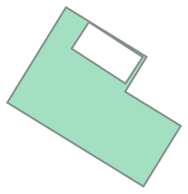

In [52]:
building_data.geometry.to_list()[0]

In [53]:
geometry_building = building_data.geometry.to_list()[0]
print(type(geometry_building))

<class 'shapely.geometry.polygon.Polygon'>


In [54]:
print(geometry_building)

POLYGON ((11195679.67704964 1555576.128393185, 11195738.765435353 1555672.0879028824, 11195819.872816345 1555622.1591065377, 11195798.332494877 1555587.1803430158, 11195854.226011204 1555552.7633939937, 11195816.677946959 1555491.7829061772, 11195679.67704964 1555576.128393185), (11195744.587444723 1555630.4480827884, 11195798.488342164 1555595.366126237, 11195815.776259085 1555621.9183479296, 11195761.875361644 1555657.0003394117, 11195744.587444723 1555630.4480827884))


In [55]:
print(geometry_building.centroid)

POINT (11195765.406632906 1555574.0943201897)


In [56]:
distance = middle_point.distance(geometry_building.centroid)
distance

270.3464594666943

In [63]:
buffered_grid_gdf = grid_gdf.copy()
buffered_grid_gdf["geometry"] = buffered_grid_gdf["geometry"].buffer(
    grid_size / 2, cap_style=3
)
buffered_grid_gdf["middle_point"] = buffered_grid_gdf.geometry.centroid

# loop each building and add to buffered_grid_gdf
buffered_grid_gdf

,geometry,middle_point
0,"POLYGON ((11196193 1555920, 11196193 1555520, ...",POINT (11195993 1555720)


In [5]:
print(type(building_data))
print()

<class 'geopandas.geodataframe.GeoDataFrame'>



In [6]:
building_data

geometry  \
element  id                                                              
relation 5972129     POLYGON ((11195679.677 1555576.128, 11195738.7...   
way      75498135    POLYGON ((11195568.402 1556038.698, 11195575.6...   
         94324290    POLYGON ((11195300.757 1556312.687, 11195416.4...   
         94324292    POLYGON ((11195420.425 1556244.115, 11195535.4...   
         123191789   POLYGON ((11195503.035 1556263.938, 11195486.8...   
...                                                                ...   
         1242431130  POLYGON ((11196105.708 1555945.351, 11196108.9...   
         1242431131  POLYGON ((11196108.981 1555950.808, 11196112.3...   
         1242431132  POLYGON ((11196112.387 1555956.323, 11196115.0...   
         1242431138  POLYGON ((11196093.574 1556132.572, 11196093.8...   
         1242431145  POLYGON ((11196160.744 1555956.495, 11196166.8...   

                       building                    name  amenity  \
element  id                                                        
relation 5972129            yes         กรามพัฒนาที่ดิน      NaN   
way      75498135    apartments             เกษตรวิลล่า      NaN   
         94324290           yes  อาคารจอดรถงามวงศ์วาน 2  parking   
         94324292           yes  อาคารจอดรถงามวงศ์วาน 1  parking   
         123191789          yes         อาคารวิทยบริการ      NaN   
...                         ...                     ...      ...   
         1242431130         yes                     NaN      NaN   
         1242431131         yes                     NaN      NaN   
         1242431132         yes                     NaN      NaN   
         1242431138         yes                     NaN      NaN   
         1242431145         yes                     NaN      NaN   

                          parking wheelchair alt_name landuse layer  \
element  id                                                           
relation 5972129              NaN        NaN      NaN     NaN   NaN   
way      75498135             NaN        NaN      NaN     NaN   NaN   
         94324290    multi-storey        NaN      NaN     NaN   NaN   
         94324292    multi-storey        yes      NaN     NaN   NaN   
         123191789            NaN        NaN      NaN     NaN   NaN   
...                           ...        ...      ...     ...   ...   
         1242431130           NaN        NaN      NaN     NaN   NaN   
         1242431131           NaN        NaN      NaN     NaN   NaN   
         1242431132           NaN        NaN      NaN     NaN   NaN   
         1242431138           NaN        NaN      NaN     NaN   NaN   
         1242431145           NaN        NaN      NaN     NaN   NaN   

                                         name:en  ... opening_hours:kitchen  \
element  id                                       ...                         
relation 5972129     Land Development Department  ...                   NaN   
way      75498135                            NaN  ...                   NaN   
         94324290                            NaN  ...                   NaN   
         94324292                            NaN  ...                   NaN   
         123191789                           NaN  ...                   NaN   
...                                          ...  ...                   ...   
         1242431130                          NaN  ...                   NaN   
         1242431131                          NaN  ...                   NaN   
         1242431132                          NaN  ...                   NaN   
         1242431138                          NaN  ...                   NaN   
         1242431145                          NaN  ...                   NaN   

                    takeaway brand brand:wikidata brand:wikipedia shop  \
element  id                                                              
relation 5972129         NaN   NaN            NaN             NaN  NaN   
way      75498135        NaN   NaN      